## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


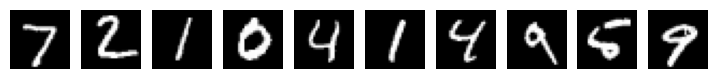

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 21s 39ms/step - loss: 0.1961 - val_loss: 0.1484
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1439 - val_loss: 0.1398
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1371 - val_loss: 0.1349
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1329 - val_loss: 0.1313
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1300 - val_loss: 0.1288
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1278 - val_loss: 0.1273
Epoch 7/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1262 - val_loss: 0.1256
Epoch 8/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1247 - val_loss: 0.1246
Epoch 9/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1235 - val_loss: 0.1235
Epoch 10/10
469/469 [==============================] - 16s 34ms/step - loss: 0.122

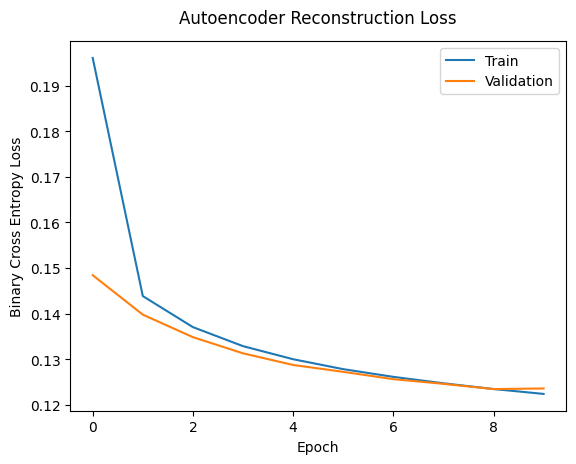

In [6]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 6ms/step


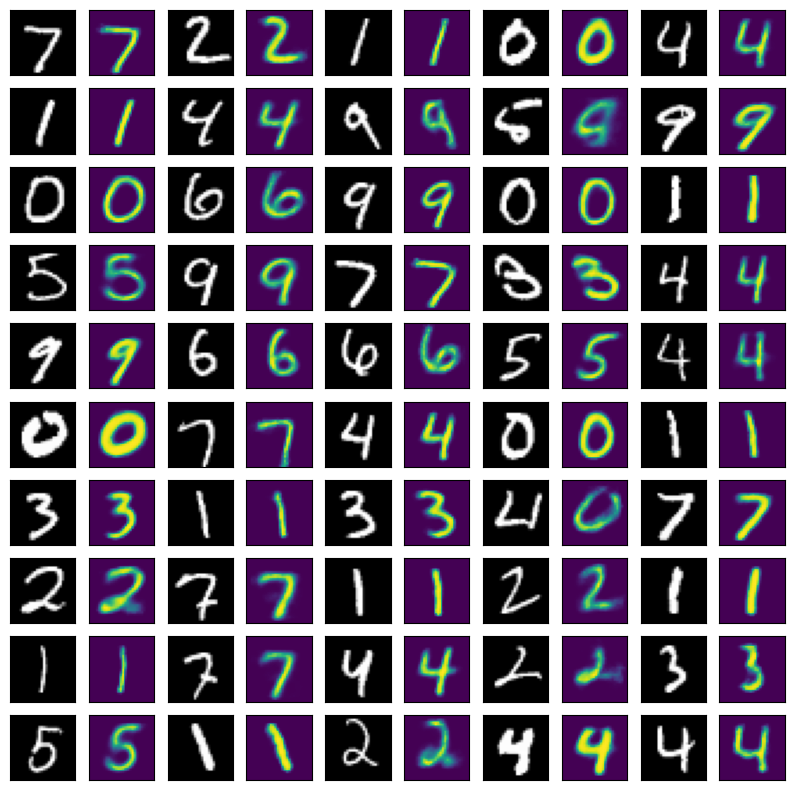

In [7]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [8]:
autoencoder.save('initially_trained_autoencoder.h5')

In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 22ms/step
(1, 784)


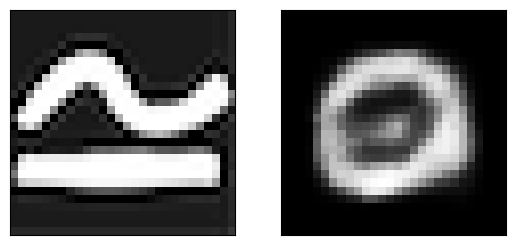

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/My Drive/testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary

Since the new image wasn't part of the original training dataset, it's seen as an 'anomoly' by the autoencoder. This is indicated by the difference (error) betweem the original image and the reconstructed image.

## Inference
## I experimented with changing the number of neurons in the bottleneck layer of a model and observed that increasing the number of neurons led to higher complexity and overfitting while decreasing the number of neurons resulted in more aggressive compression and loss of information. So far 6 neurons the image is not so good and for 16 neurons it is better than 6 and for 100 neurons the output is unidentifiable.